In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run -i runup_funcs.py
%run -i wave_funcs.py 


print(calc_L0(10))

print(func_list)

for item in func_list:
    cmd = "print({}())".format(item, item)
    print(item)
    exec(cmd)

print('Raub')
R2R, S, setup, Sinc, SIG, ir, R16R = calcR2_Raubenheimer(2., 10., .05, .005)
print(R2R)

156.13099917314932
['A17', 'D20', 'H86', 'NH91', 'P14', 'R01', 'S06', 'S11', 'V12']
A17
0.3498845445000393
D20
5.574916526297034
H86
0.6933375474091239
NH91
1.764186045187383
P14
0.7407072495843278
R01
0.6747429110409386
S06
0.7371541008103424
S11
1.4210386883731967
V12
0.2105119278636574
Raub
1.0514324637448569


In [2]:
# SS band
f_lo = 0.04
f_hi = 0.25
T_lo = 1/f_lo
T_hi = 1/f_hi
w_lo = 2.*np.pi*f_lo
w_hi = 2.*np.pi*f_hi
print('T:',T_lo, T_hi)
print('f:',f_lo, f_hi)
print('w:',w_lo, w_hi)

T: 25.0 4.0
f: 0.04 0.25
w: 0.25132741228718347 1.5707963267948966


In [3]:
beta_f = 0.05
beta_eff = 0.005
Ess, f, df = jonswap_ess(2., 10.)
R2IPA = two_slope_IPA_free(Ess, f, df, beta_f, beta_eff)
print(R2IPA)

0.672110644099395


[45. 40. 35. 30. 25. 20. 15. 10.  5.  0.  5. 10. 15. 20. 25. 30. 35. 40.
 45.]
[1.41421356 1.53208889 1.63830409 1.73205081 1.81261557 1.87938524
 1.93185165 1.96961551 1.9923894  2.         1.9923894  1.96961551
 1.93185165 1.87938524 1.81261557 1.73205081 1.63830409 1.53208889
 1.41421356]


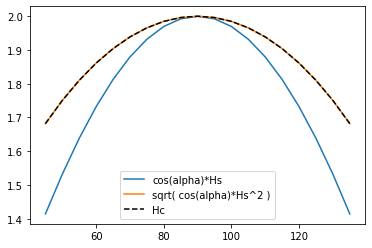

In [4]:

paz = 90.
dang = 5.
T = 10.
Hs = 2.
wdir = np.arange(45.,135.+dang,dang)
alp = np.abs(paz-wdir)
print(alp)
ns = np.sqrt( np.cos(np.deg2rad(alp))*Hs**2 )
n = np.cos(np.deg2rad(alp))*Hs
Hc = ang_corr(Hs, wdir, paz)
print(n)
plt.plot(wdir,n,label='cos(alpha)*Hs')
plt.plot(wdir, ns,label='sqrt( cos(alpha)*Hs^2 )')
plt.plot(wdir, Hc, '--k', label='Hc')
plt.legend()

Text(0.5, 0, 'Timing error (h)')

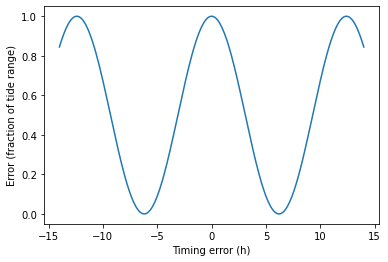

In [5]:
dt = 0.1
trange = 1.
period = 12.4
time_lag = np.arange(-14,14+dt,dt)
omega = 2*np.pi/period
theight = 0.5*trange*np.cos(omega*time_lag)+trange/2.
plt.plot(time_lag, theight)
plt.ylabel('Error (fraction of tide range)')
plt.xlabel('Timing error (h)')

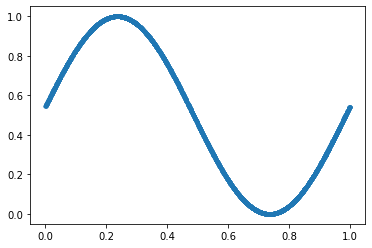

In [6]:
phase_err_std = -4.8
#phase_err_std = 0.
phase = np.random.random_sample(5000)
herr = 0.5*trange*np.cos(omega*phase*period-phase_err_std)+trange/2
plt.plot(phase, herr,'.')

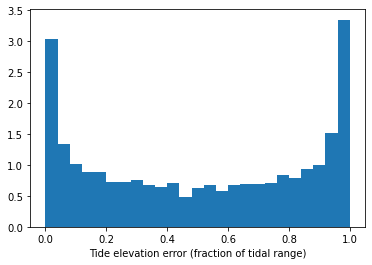

In [7]:
plt.hist(herr,bins=25, density=True)
_ = plt.xlabel('Tide elevation error (fraction of tidal range)')

(array([   2.,   25.,  142.,  507., 1167., 1480., 1058.,  495.,  107.,
          17.]),
 array([-21.54209055, -17.85605079, -14.17001104, -10.48397129,
         -6.79793153,  -3.11189178,   0.57414797,   4.26018773,
          7.94622748,  11.63226723,  15.31830699]),
 <BarContainer object of 10 artists>)

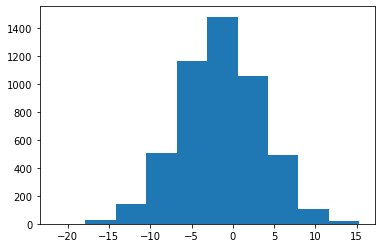

In [8]:
# make a random distribution of timing error
emean = 0.
estd = 1.
etime = np.random.normal(loc=-1.4, scale=4.8, size=5000)
plt.hist(etime)

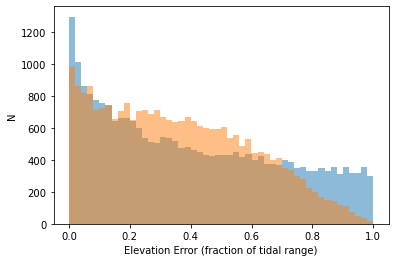

In [46]:
# uniform dist of phase at forecast arrival times
phase =  np.random.random_sample(25000)

# gaussian dist of phase error in timing of storm wrt tides
phase_err = np.random.normal(loc=-1.2, scale=4.8, size=25000)
phase_err2 = np.random.normal(loc=-1.2, scale=.1, size=25000)

htpred = 0.5*trange*np.cos(omega*phase*period)
hterr =  0.5*trange*np.cos(omega*(phase-phase_err)*period)
hterr2 =  0.5*trange*np.cos(omega*(phase-phase_err2)*period)

herr = np.abs(htpred-hterr)
herr2 = np.abs(htpred-hterr2)

_ =plt.hist(herr, bins=50, density=False, alpha=.5)
_ =plt.hist(herr2, bins=50, density=False, alpha=.5)

plt.ylabel('N')
_ = plt.xlabel('Elevation Error (fraction of tidal range)')

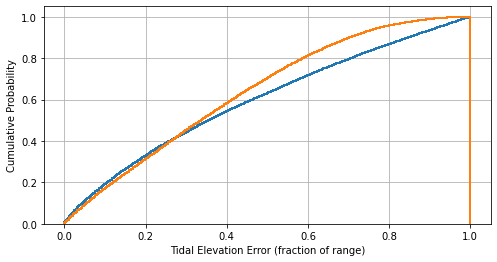

In [47]:
# plot the cumulative histogram
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(herr, 500, density=True, histtype='step',
                           cumulative=True, label='Empirical',linewidth=2)
n, bins, patches = ax.hist(herr2, 500, density=True, histtype='step',
                           cumulative=True, label='Empirical',linewidth=2)
plt.xlabel('Tidal Elevation Error (fraction of range)')
plt.ylabel('Cumulative Probability')
plt.grid()

Text(0, 0.5, 'Likelihood of occurrence')

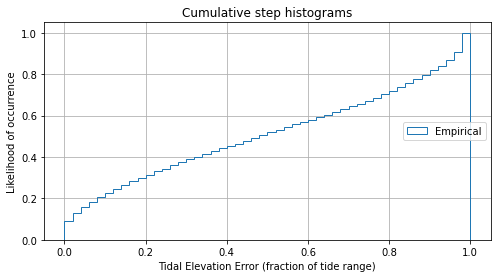

In [11]:

mu = -1.2
sigma = 4.8
n_bins = 50
x = np.cos( (2*np.pi/12.4) * np.random.normal(mu, sigma, size=100) )**2

# plot the cumulative histogram
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(herr, 50, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

# ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Tidal Elevation Error (fraction of tide range)')
ax.set_ylabel('Likelihood of occurrence')
